In [333]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import re
import pandas as pd 

Idea here is a function that takes a URL and returns a dictionary from country to number of cases, deaths, and recoveries. This is pretty terrible but it's a start.

In [468]:
def cleanCountry(string):
    newString = re.sub(r'\[.*\]', '', string)
    newString = re.sub(r'\(.*\)', '', newString)
    if len(newString)>1:
        if newString[0]==" ":
            newString=newString[1:]
        if newString[-1]==" ":
            newString=newString[:-1]
    return newString
    

In [729]:
def cleanNumber(string):
    return int(cleanCountry(string).replace(",","").replace(".","").replace("–","0").replace("?","0").replace("-","0").replace("~","0"))

In [875]:
def getDictionaryFromWikiTable(url):
    website_url = requests.get(url).text
    soup = BeautifulSoup(website_url,"html.parser")
    My_table = soup.find("table",{"class":"wikitable plainrowheaders sortable"})
    if type(My_table) != bs4.element.Tag:
        My_table = soup.find("table",{"class":"wikitable plainrowheaders sortable mw-collapsible"})
    #return My_table
    
    # Find countries or things like them
    links=My_table.findAll("tr")
    countries=[]
    start=0
    for link in links:
        #if len(link.findAll('th'))==2:
        if start==0:
            if "United" in cleanCountry(link.findAll('th')[-1].text[:-1]):
                start=1
        if start==1:
            if len(link.findAll('td')) < 3:
                break
            country = cleanCountry(link.findAll('th')[-1].text[:-1])
            nums = [cleanNumber(link.findAll('td')[i].text[:-1]) for i in range(3)]
            countries.append([country]+nums)
    
    #Generate dictionary
    myDict = {}
    for i in range(len(countries)):
        myDict[countries[i][0]]=countries[i][1:]
    return myDict

Let's find the URLs of all the pages that we want to scrape.

In [573]:
#history = "https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&offset=&limit="+str(10000)+"&action=history"
history="https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&offset=20200301201057&limit=5000&action=history"
website_url = requests.get(history).text
soupTemp = BeautifulSoup(website_url,"html.parser")
    

In [607]:
def getUrls(dates,limit):
    # Ensure limit is really big
    history = "https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&offset=&limit="+str(limit)+"&action=history"
    website_url = requests.get(history).text
    soup = BeautifulSoup(website_url,"html.parser")
    My_table = soup.find("form",{"id":"mw-history-compare"})
    #My_table = soupTemp.find("form",{"id":"mw-history-compare"})
    datesloc=My_table.findAll("a")
    #return datesloc
    urls=[]
    for datetext in dates:
        versions=[]
        for date in datesloc:
            if datetext in date.text:
                versions.append(date["href"])
        if len(versions)>0:
            urls.append("https://en.wikipedia.org"+versions[-1])
        else:
            print("date not found")
    return urls

In [1173]:
getUrls(["30 March 2020"],500)

['https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=948067291']

In [347]:
datestext=[str(i)+" March 2020" for i in range(1,19)]

In [524]:
datestext=[str(i)+" February 2020" for i in range(1,30)]

In [527]:
datestext

['1 February 2020',
 '2 February 2020',
 '3 February 2020',
 '4 February 2020',
 '5 February 2020',
 '6 February 2020',
 '7 February 2020',
 '8 February 2020',
 '9 February 2020',
 '10 February 2020',
 '11 February 2020',
 '12 February 2020',
 '13 February 2020',
 '14 February 2020',
 '15 February 2020',
 '16 February 2020',
 '17 February 2020',
 '18 February 2020',
 '19 February 2020',
 '20 February 2020',
 '21 February 2020',
 '22 February 2020',
 '23 February 2020',
 '24 February 2020',
 '25 February 2020',
 '26 February 2020',
 '27 February 2020',
 '28 February 2020',
 '29 February 2020']

In [577]:
Urlstext=getUrls(datestext,100)

In [605]:
Urlstext

['https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=938566085',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=938722769',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=938886445',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939041138',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939201335',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939362116',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939524881',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939679762',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandem

Now scrape those URLs

In [ ]:
FebUrlstext=['https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=938566085',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=938722769',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=938886445',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939041138',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939201335',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939362116',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939524881',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939679762',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939833918',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=940002901',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=940174916',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=940342980',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=940512502',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=940683119',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=940852174',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=941010764',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=941175150',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=941358392',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=941506785',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&direction=next&oldid=941684122',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=941848218',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=942002862',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=942161086',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=942326494',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=942496885',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=942649494',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=942813905',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=942965838',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=943124253']

In [1174]:
MarUrlstext=['https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=943311597',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=943454674',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=943633545',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=943799750',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=943984373',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=944142051',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=944306871',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=944460601',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=944630177',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=944799518',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=944965160',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=945127664',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=945288396',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=945439727',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=945597450',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=945762744',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=945925005',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=946086474',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=946244618',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=946409034',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=946563137',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=946718710',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=946887611',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=947049998',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=947216159',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=947387849',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=947549094',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=947706515',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=947875079',
 'https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=948067291']

In [603]:
allDicts = []
for urls in Urlstext:
    try:
        allDicts.append(getDictionaryFromWikiTable(urls))
    except:
        print(urls)

https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=938566085
https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=938722769
https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=938886445
https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939041138
https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939201335
https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939362116
https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939524881
https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939679762
https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&oldid=939833918
https://en

In [470]:
allKeys=np.sort(list(set.union(*[set(ad.keys()) for ad in allDicts])))

In [474]:
len(allKeys)

158

In [475]:
[len(ad) for ad in allDicts]

[65, 68, 77, 81, 85, 87, 96, 102, 103, 108, 112, 116, 120, 134, 137, 142, 147]

In [476]:
allKeys

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'DR Congo', 'Denmark', 'Diamond Princess', 'Dominican Republic',
       'Ecuador', 'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Gibraltar', 'Grand Princess', 'Greece', 'Guatemala',
       'Guernsey', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'International\xa0conveyance',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivo

In [622]:
allKeys=['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'DR Congo', 'Denmark', 'Diamond Princess', 'Dominican Republic',
       'Ecuador', 'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Gibraltar', 'Grand Princess', 'Greece', 'Guatemala',
       'Guernsey', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast',
       'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Latvia', 'Lebanon', 'Liberia',
       'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Macau', 'Malaysia', 'Maldives', 'Malta',
       'Mauritania', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Morocco',
       'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria',
       'North Korea', 'North Macedonia', 'Northern Cyprus', 'Norway',
       'Oman', 'Pakistan', 'Palestine', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Republic of the Congo', 'Romania', 'Russia', 'Rwanda',
       'Saint Lucia', 'San Marino', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'Somalia',
       'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Taiwan', 'Tanzania',
       'Thailand', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan', 'Vatican City',
       'Venezuela', 'Vietnam']

In [580]:
allDicts[0]['United States']

[13, 0, 3]

In [522]:
def getData(dictIndex,key):
    try:
        output = allDicts[dictIndex][key]
    except:
        output = ["","",""]
    return output

In [615]:
def getData2(dic,key):
    try:
        output = dic[key]
    except:
        output = ["","",""]
    return output

In [604]:
data=np.array([np.concatenate([getData(i,key) for key in allKeys]) for i in range(len(allDicts))])

header1=np.concatenate([[key,"",""] for key in allKeys])

header2=np.concatenate([["cases","dead","recovered"] for key in allKeys])

allData=np.concatenate(((header1,header2),data),axis=0)

np.savetxt("/home/handmer/Documents/Projects/Covid/COVID19numbersFeb.csv",allData,delimiter=",", fmt='%s', comments='',)

For updating the daily numbers

In [1180]:
todayKeys=['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'DR Congo', 'Denmark', 'Diamond Princess',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar',
       'Grand Princess', 'Greece', 'Grenada', 'Guatemala', 'Guernsey',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Ivory Coast',
       'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
       'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Macau', 'Madagascar', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Monaco',
       'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Niger', 'Nigeria', 'North Korea', 'North Macedonia',
       'Northern Cyprus', 'Norway', 'Oman', 'Pakistan', 'Palestine',
       'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Qatar', 'Republic of the Congo', 'Romania',
       'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia',
       'San Marino', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
       'Singapore', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa',
       'South Korea', 'Spain', 'Sri Lanka',
       'St. Vincent and the Grenadines', 'Sudan', 'Suriname', 'Sweden',
       'Switzerland', 'Syria', 'Taiwan', 'Tanzania', 'Thailand', 'Togo','Transnistria',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Uzbekistan', 'Vatican City', 'Venezuela', 'Vietnam',
       'Zambia', 'Zimbabwe']

In [1175]:
today = getDictionaryFromWikiTable(MarUrlstext[-1])

In [1181]:
set(today.keys())-set(todayKeys)

{'MS Zaandam'}

In [1177]:
set(todayKeys)-set(today.keys())

{'Aruba', 'Gibraltar', 'Grand Princess', 'North Korea'}

In [1178]:
todayKeys=np.sort(list(set(today.keys())|set(todayKeys)))

In [1179]:
data=np.concatenate([getData2(today,key) for key in todayKeys])

header1=np.concatenate([[key,"",""] for key in todayKeys])

header2=np.concatenate([["cases","dead","recovered"] for key in todayKeys])

allData=np.array([header1,header2,data])

np.savetxt("/home/handmer/Documents/Projects/Covid/COVID19numbersToday.csv",allData,delimiter=",", fmt='%s', comments='',)

Let's crunch the US data from covidtracking.com

In [1182]:
import csv

USData=[]

with open("/home/handmer/Documents/Projects/Covid/COVIDUSA.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        USData.append(row)
        #if line_count == 0:
        #    print(f'Column names are {", ".join(row)}')
        #    line_count += 1
        #else:
        #    print(row)
        #    line_count += 1
    #print(f'Processed {line_count} lines.')

In [1183]:
dates=np.sort(list(set([x[0] for x in USData[1:]])))

In [1184]:
states=np.sort(list(set([x[1] for x in USData[1:]])))

In [1185]:
dates

array(['20200304', '20200305', '20200306', '20200307', '20200308',
       '20200309', '20200310', '20200311', '20200312', '20200313',
       '20200314', '20200315', '20200316', '20200317', '20200318',
       '20200319', '20200320', '20200321', '20200322', '20200323',
       '20200324', '20200325', '20200326', '20200327', '20200328',
       '20200329'], dtype='<U8')

In [1186]:
def generateDictFromDate(date):
    myDict={}
    for x in USData:
        if x[0]==date:
            out=[]
            for y in x[2:]:
                try:
                    out.append(int(y))
                except:
                    out.append(0)
            myDict[x[1]]=out
    return myDict

In [1187]:
USDicts=[generateDictFromDate(d) for d in dates]

In [1188]:
USDicts[0]['AZ']

[2, 27, 5, 0, 0, 34]

In [1189]:
def getData3(dic,key):
    try:
        output = dic[key]
    except:
        output = ["","","","","",""]
    return output

In [1190]:
USData[0][2:]

['Positive', 'Negative', 'Pending', 'Hospitalized', 'Death', 'Total']

In [1191]:
data2=np.array([np.concatenate([getData3(USD,key) for key in states]) for USD in USDicts])
header1=np.concatenate([[key,"","","","",""] for key in states])
header2=np.concatenate([USData[0][2:] for key in states])
allData2=np.concatenate(((header1,header2),data2),axis=0)
np.savetxt("/home/handmer/Documents/Projects/Covid/COVID19USData.csv",allData2,delimiter=",", fmt='%s', comments='',)

What do we do with this data?

Let's crunch the US data set and make a graph.

In [1139]:
MyHeader=[]
MyData=[]

with open("/home/handmer/Documents/Projects/Covid/COVID19USData.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count>2:
            MyData.append([intIFyHelper(r) for r in row])
        else:
            MyHeader.append(row)
        line_count+=1

In [947]:
def intIFyHelper(string):
    if string=="":
        return 0
    else:
        return int(string.replace(",",""))

In [935]:
from matplotlib import pyplot as plt

It's not beautiful but this graph shows log 10 daily case count.

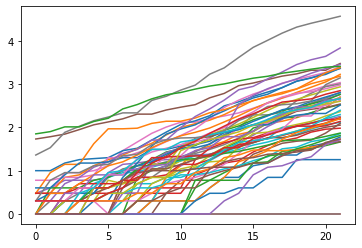

In [940]:
for d in np.array(MyData)[:,::6].T:
    plt.plot(np.log10(d+1))

In [942]:
MyHeader[1][:6]

['Positive', 'Negative', 'Pending', 'Hospitalized', 'Death', 'Total']

This one shows deaths.

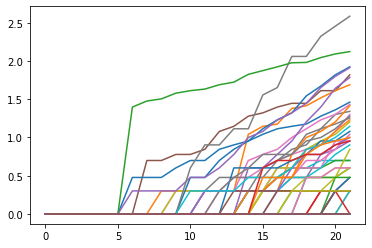

In [944]:
for d in np.array(MyData)[:,4::6].T:
    plt.plot(np.log10(d+1))

What's going on with New York?

In [1145]:
MyHeader[0][6*37]

'NY'

In [1148]:
np.array(MyData).shape

(23, 336)

In [1149]:
NYData = np.array(MyData)[:,6*37:6*38]

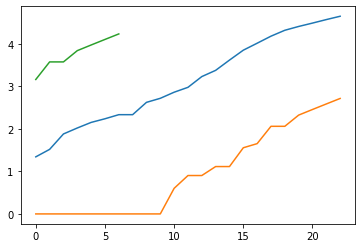

In [1155]:
plt.plot(np.log10(NYData[:,0]))
plt.plot(np.log10(NYData[:,4]+1))
plt.plot(np.log10(33*NYData[16:,4]+1))

Let's look at the international data. This one we have to download from https://docs.google.com/spreadsheets/d/1R4w87T2AoM3-5mSOpz7dhHJ0EsNaZXHM5BG5NE3p8zA/edit#gid=1114761837.

In [1192]:
IntHeader=[]
IntData=[]
IntDates=[]

with open("/home/handmer/Downloads/COVID-19 numbers - World Data (1).csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count>50:
            IntData.append([intIFyHelper(r) for r in row[1:]])
            IntDates.append(row[0])
        else:
            IntHeader.append(row)
        line_count+=1

In [1193]:
np.array(IntData).shape

(72, 561)

Let's take a look at China's data, then South Korea, Italy, and US.

If I had the time/intelligence/presence of mind I'd have imported everything as a nice dictionary, like I created it. I didn't, so we're gonna hack.

In [1194]:
IntHeader[0][1:][102]

'China'

In [1195]:
ChinaData = np.array(IntData)[:68,102:105]

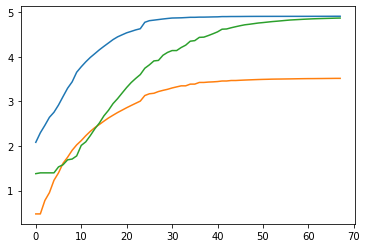

In [1196]:
for f in ChinaData.T:
    plt.plot(np.log10(f))

As several astute people have pointed out, there are a few irregularities in China's data. They include the quadratic curve, double day death counts, and most importantly, the regular tracking between new cases and deaths.

In [1197]:
IntHeader[1][1:4]

['cases', 'dead', 'recovered']

Here is the ratio of the cumulative death rate to cumulative case rate, giving the overall case fatality rate. Generally, this number starts high as only the sickest cases are identified, then drops as more cases are found before they die, eventually asymptoting to some value. Instead, these values do the opposite.

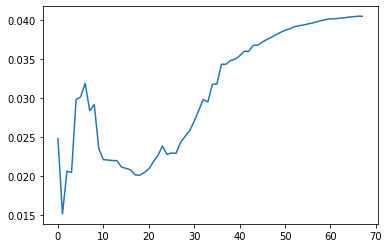

In [1198]:
plt.plot(ChinaData[:,1]/ChinaData[:,0])

In [1199]:
def safeDivide(a,b):
    mask = np.abs(np.sign(b))#mask is 0 where b is 0.
    return a/(1-mask+b)

What do we expect to see? With current (late March 2020) understanding of the epidemiology, we expect to see curves that look a bit like this.

In [1200]:
infected1=np.ceil([10*1.1**n for n in range(8*7)])
infected2=np.ceil([infected1[-1]*1.05**n for n in range(1,4*7)])
infected3=np.ceil([infected2[-1]*1.01**n for n in range(1,6*7)])
infected=np.concatenate((infected1,infected2,infected3))
symptomatic = np.ones(infected.shape)
symptomatic[6:]=np.ceil(0.5*infected[:-6])
dead = np.ones(infected.shape)
dead[10:] = np.ceil(0.05*symptomatic[:-10])

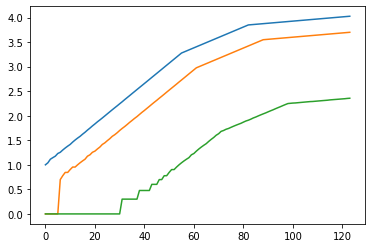

In [1201]:
plt.plot(np.log10(infected))
plt.plot(np.log10(symptomatic))
plt.plot(np.log10(dead))

What we see here is that cases double every week until deaths reach 10, at which point some social distancing takes place around day 56. This shows up as a reduction in cumulative death rate about day 70. Further social distancing on day 85 finally bends the new case rate downward, with corresponding lags in symptomatic presentations and deaths.

Let's take another look at the chinese death data and translate the case data to match it.

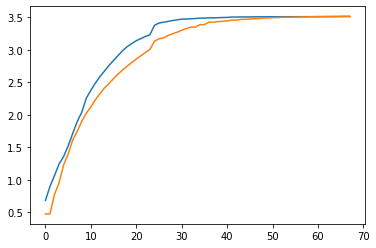

In [1202]:
plt.plot(np.log10(0.04*ChinaData[:,0]))
plt.plot(np.log10(ChinaData[:,1]))

Here we have reduced the case rate by a factor of 25 for a strong match with the death data. In fact, the deaths drop off more quickly than new cases, after Wuhan implemented social distancing in late January. The *only* way this could be legit is if, on the same date any given person died of COVID, Chinese contact tracers went out and found exactly 25 other infected people, tested them, and got the results back the same day. I could see a situation in which a family death results in the rest of the household being tested and thus added to the case tally, but this doesn't match reports from the region which stated that cases were only counted during admissions. In which case it implies there are 25 admissions for every death, for about 30 consecutive days. Unless 24 of those 25 people were discharged on the same day, the hospital would quickly run out of room. 

Finally, let's look at the data on a log-log graph.

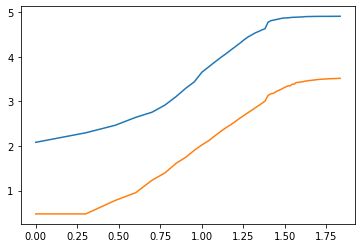

In [1203]:
plt.plot(np.log10(np.arange(1,69)),np.log10(ChinaData[:,0]))
plt.plot(np.log10(np.arange(1,69)),np.log10(ChinaData[:,1]))

This is the final suspicious signal I'll mention here. The cumulative death rate tracks a polynomial (quadratic) curve for about 25 consecutive days. Other studies have found an R of 0.999 for this fit, which is impossible unless the numbers were generated by this function. Not an exponential, a quadratic. 

https://www.barrons.com/articles/chinas-economic-data-have-always-raised-questions-its-coronavirus-numbers-do-too-51581622840

Let's look at some less cooked data: South Korea.

In [1204]:
IntHeader[0][1:][3*158]

'South Korea'

In [1205]:
SKData = np.array(IntData)[:68,3*158:3*159]

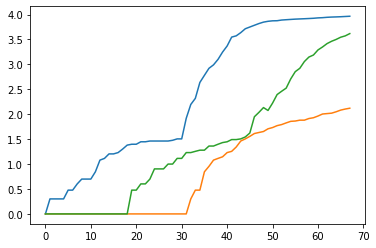

In [1206]:
for f in SKData.T:
    plt.plot(np.log10(f+1))

SK had a superspreader in a church organization lead to the first major outbreak outside of China. On Day 30, these cases were discovered and testing ramped quickly, leading to track/trace and containment by about day 40. An incredible achievement. Actual infections are somewhat to the left of the blue curve between days 20 and 35, something like the red line below. Blue is cases, green is recoveries, yellow is deaths.

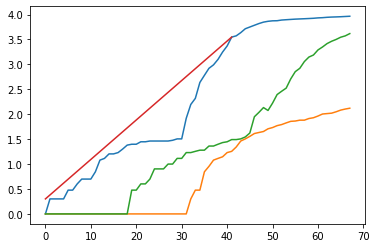

In [1207]:
for f in SKData.T:
    plt.plot(np.log10(f+1))
infections = [2*1.2**n for n in range(42)]
plt.plot(np.log10(infections))

In cases where testing is more limited, tests may be reserved exclusively for gravely ill patients, in which case death counts are a more accurate indication of where infections might have been 2 weeks previously. There are, however, numerous confounding factors.

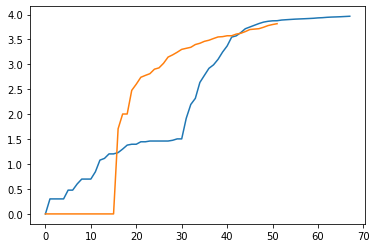

In [1208]:
plt.plot(np.log10(SKData[:,0]+1))
plt.plot(np.log10(50*SKData[16:,1]+1))

This graph shows SK's death rate transposed 16 days left and a factor of 50 up (2% CFR) showing what the true infection rate might have actually been. This is (I emphasize) not actually that useful because not everyone takes the same time to die, treatment can improve (or get worse), different populations with different risk profiles get infected at different times, etc etc etc.

Let's take a look at Italy

In [1209]:
IntHeader[0][1:][3*85]

'Italy'

In [1236]:
ItalyData= np.array(IntData)[:71,3*85:3*86]

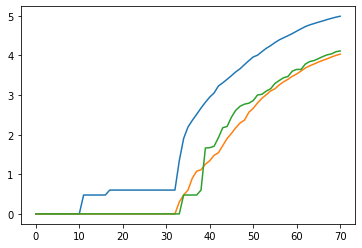

In [1238]:
for f in ItalyData.T:
    plt.plot(np.log10(f+1))

Mercifully, we can see here that the death rate has begun to drop as a result of the lockdown implemented about 2 weeks ago.

The death and case rate are quite smooth, such that in principle there are multiple ways they could be overlaid.

/home/handmer/Documents/Projects/Covid/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


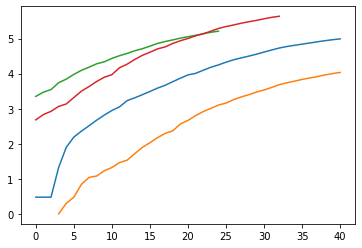

In [1239]:
plt.plot(np.log10(ItalyData[30:,0]))
plt.plot(np.log10(ItalyData[30:,1]))
plt.plot(np.log10(15*ItalyData[46:,1]))
plt.plot(np.log10(40*ItalyData[38:,1]))

Here we see that for any sensible choice of parameters, the case rate (blue) lags infection rate (green, red) by a substantial margin, indicating that Italian testing has not yet caught up with asymptomatic, or even mildly ill patients. The green curve corresponds to a 16 day infection-death average time, with a 7% mortality rate. The red curve corresponds to a 8 day infection-death time, with a 2.5% fatality rate. Unfortunately, no matter what fit you prefer some tragedy is preserved. Either the illness takes a long time but kills a lot, or it is quick and kills somewhat less. It is hard to say in this case since so many Italian patients were old, ill, and unable to be admitted to an ICU.

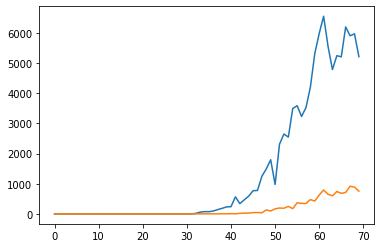

In [1241]:
plt.plot(np.diff(ItalyData[:,0]))
plt.plot(np.diff(ItalyData[:,1]))

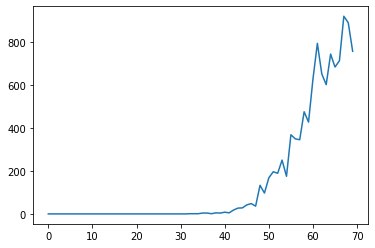

In [1242]:
plt.plot(np.diff(ItalyData[:,1]))

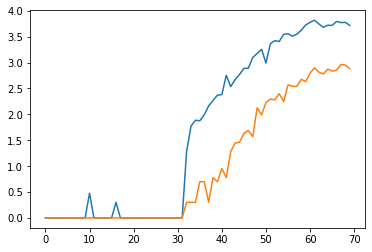

In [1243]:
plt.plot(np.log10(np.diff(ItalyData[:,0])+1))
plt.plot(np.log10(np.diff(ItalyData[:,1])+1))

In [1088]:
IntHeader[0][1:][3*80]

'Iran'

In [1244]:
IranData= np.array(IntData)[:71,3*80:3*81]

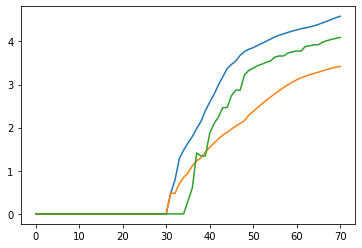

In [1245]:
for f in IranData.T:
    plt.plot(np.log10(f+1))

This is Iran's data. The recovery rate closely matches the case rate, indicating that cases here are a mix of clinically diagnosed relatively mild infections, and serious cases. 

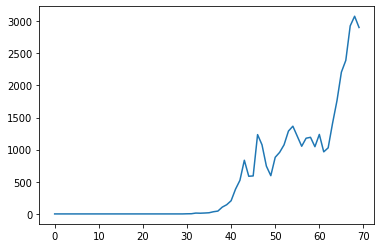

In [1246]:
plt.plot(np.diff(IranData[:,0]))

This graph shows daily new cases, which hovered around 1200 for almost 3 weeks as the Iranian health system was crushed under the load. It seems to me that 1200 represented their testing capacity. 

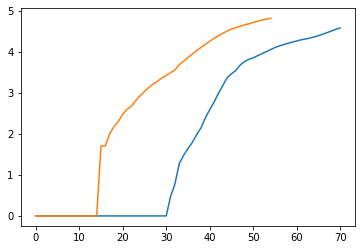

In [1247]:
plt.plot(np.log10(IranData[:,0]+1))
plt.plot(np.log10(25*IranData[16:,1]+1))

Indeed, if we shift the death rate back by 16 days and up by 25 (4% mortality) then we see the true infection rate is likely at least an order of magnitude beyond the current case tally. Maybe USA isn't actually Number One?

In [1248]:
IntHeader[0][1:][3*179]

'United States'

In [1249]:
USAData= np.array(IntData)[:71,3*179:3*180]

Most of this growth is due to the outbreak in New York, which is still poorly understood. 

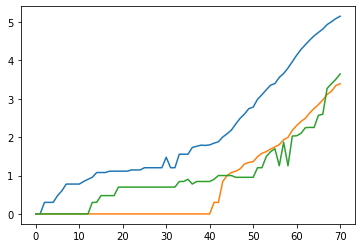

In [1250]:
for f in USAData.T:
    plt.plot(np.log10(f+1))

If we transpose the US death rate by 16 days and 50 (mortality 2%, as the health care system is generally not yet completely overwhelmed) we see that actual infections may be 100x more than known cases, which being determined by PCR testing are still being rationed to the very ill or very rich. The green line shows 15% daily growth in infections in the "background". Unfortunately, no country can ramp testing faster than infections indefinitely. There is some ceiling, and hopefully extreme social distancing measures will reduce new infections to the level where testing can catch up.

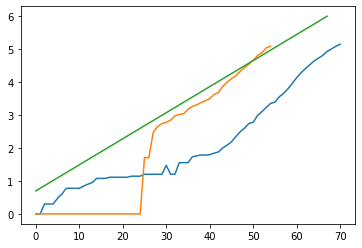

In [1251]:
plt.plot(np.log10(USAData[:,0]+1))
plt.plot(np.log10(50*USAData[16:,1]+1))
infections=[5*1.2**n for n in range(68)]
plt.plot(np.log10(infections))

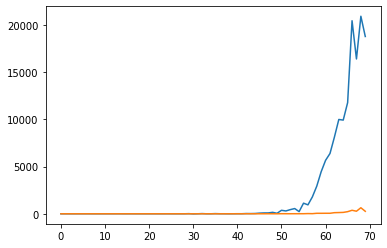

In [1255]:
plt.plot(np.diff(USAData[:,0]))
plt.plot(np.diff(USAData[:,1]))

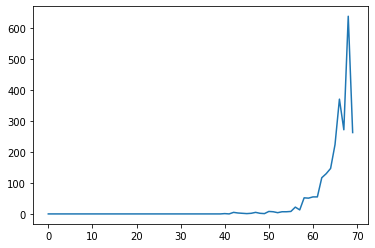

In [1256]:
plt.plot(np.diff(USAData[:,1]))

/home/handmer/Documents/Projects/Covid/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/handmer/Documents/Projects/Covid/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/home/handmer/Documents/Projects/Covid/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


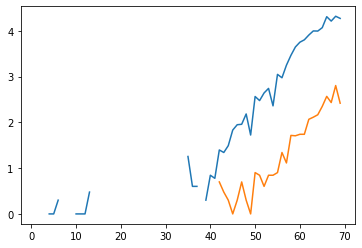

In [1257]:
plt.plot(np.log10(np.diff(USAData[:,0])))
plt.plot(np.log10(np.diff(USAData[:,1])))